# Fitting a model to data

So we want to fit a straight line to data using python, and plot the results. This is very simple. First we need to import the relevant modules

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

# the following two lines use the python module 'seaborn'
# to give a pretty look to the default plot style
# you can ignore these lines if you don't have seaborn
# installed, or you're happy with the default look!
import seaborn as sns
sns.set()

Now we wish to load in the data to fit. This is stored in a comma separated file. The <code>loadtxt</code> function in numpy will do this simply and will load each column into arrays called x, y and e.

In [2]:
x,y,e = np.loadtxt('data.csv',delimiter=",",unpack=True)

Now we have our arrays of data we can use numpy's polynomial fitting routines to fit a straight line. First of all we'll use it in the most basic form to fit the x and y data, ignoring the uncertainties.

In [24]:
degree = 1 # order of the polynomial to fit.
poly_params = np.polyfit(x,y,degree)
print( poly_params )

[ 2.62694394  2.24127304]


Note two things: that the polyfit routine returns a list of the polynomial parameters, and that numpy refers to a straight line as a polynomial of order 1.

Now we have our fit, let's plot it on top of the data. First, we create a polynomial function from our best-fit parameters

In [20]:
poly = np.poly1d(poly_params)

The line above creates a function, called *poly*. We can calculate the value of this function at our data points, *x*, to create a new array of our best fit values

In [21]:
yfit = poly(x)

Now we'll plot this as a straight line on top of our data

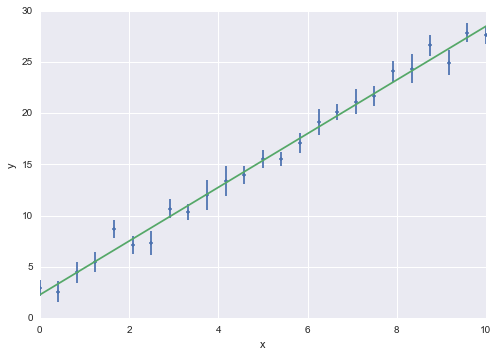

In [22]:
plt.errorbar(x,y,yerr=e,fmt='.')
plt.plot(x,yfit)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What if we don't want to ignore the errors? We can use them as <b>weights</b> in the fit. We want to weight each point by the inverse of the variance.

In [23]:
weights = 1./e**2
poly_params = np.polyfit(x,y,degree,w=weights)
print(poly_params)

[ 2.58730165  2.3749575 ]


What if we want to know the uncertainties on our best fit? This will be true most of the time! We can ask the polyfit routine to return the <em>covariance matrix</em> for our parameters. The diagonal elements of this matrix are our uncertainties, and can easily be extracted using numpy's <code>diag</code> function

In [25]:
poly_params, covar_mat = np.polyfit(x,y,degree,w=weights,cov=True)
print(covar_mat)

[[ 0.00362142 -0.01710338]
 [-0.01710338  0.11177377]]


In [26]:
param_errs = np.diag(covar_mat)
print(param_errs)

[ 0.00362142  0.11177377]


## More complex models

If we want to fit a model which is more complex than a straight line, we can use scipy's **optimize** library. This library has many routines for finding the parameters of a model which best fit your data. Before using it, we need to think carefully about what this means.

Suppose we have some model $y = f(x)$, where $f$ depends upon a set of parameters, $\phi$. As an example, $y = mx + c$ is just such a model, where the parameters are $m$ and $c$. Fitting a model means finding the parameters where the model best fits your data.

It is apparent that we need a *figure of merit* - some number we can calculate that quantifies the quality of the fit. Two common figures of merit are the **sum of the squares (SS)** and $\chi^2$.

$$SS = \sum_i^N (y_i-y(x_i))^2$$

$$\chi^2 = \sum_i^N \left(\frac{y_i - y(x_i)}{e_i}\right)^2$$

With these figures of merit defined, we can see a good fit is one that **minimises** either $\chi^2$ or the sum of the squares.

Let's start by writing a python function that takes an x position, and our parameters as arguments, and returns the value our model predicts. 

In [27]:
def funcToFit(x,m,c):
    return m*x + c

Now we can use the [curve fit](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) function in scipy's [optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) package, which uses an algorithm called the Levenberg-Marquardt algorithm to find the parameters which best fit our data.

Note the use of string formatting in the example below. For a reminder about string formatting - see [here](http://openbookproject.net/thinkcs/python/english3e/strings.html#the-string-format-method).

In [29]:
from scipy.optimize import curve_fit

# we need an initial guess for our starting parameters
# this is a list with one entry for each parameter
p0 = [2,2]

# running curve_fit returns a list of the best fit parameters,
# and the covariance matrix
popt,pcov = curve_fit(funcToFit,x,y,p0,sigma=e)

# let's print out our fits
# i use numpy's diag function to pick out the diagonal
# elements of the covariance matrix
print( popt )
print( np.diag(pcov) )

# also, let's use python's string formatting to print out in a 
# nice format. Note how I ensure the correct number of decimal places
m,c = popt
em,ec = np.diag(pcov)
print( 'Gradient  = {0:.3f} +/- {1:.3f}'.format(m,em) )
print( 'Intercept = {0:.1f} +/- {1:.1f}'.format(c,ec) )

[ 2.6085712   2.31664545]
[ 0.00325808  0.10553813]
Gradient  = 2.609 +/- 0.003
Intercept = 2.3 +/- 0.1


You can see that the results obtained agree well with fitting a straight line using numpy's polyfit package - as they should! However, this latter method can be used to fit much more complicated models than a straight line.

This is what we will do in the main lab session - use Python's data fitting power to fit data obtained on a transiting exoplanet.

-------------------------------
######The cell below sets the visual style of the notes. Please ignore it!

In [1]:
from IPython.core.display import HTML
css_file = '../styles.css'
HTML(open(css_file, "r").read())